In [1]:
# Here based on the person's information we need to predict that they will survive or not (Binary Classification Problem)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Imports Decision Tree model for classification tasks
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree  # Imports function to visualize the trained Decision Tree structure

In [2]:
titanic = sns.load_dataset("titanic")  # loading a built-in dataset provided by Seaborn

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# We are not going to select all the features, we will select only few particular features 
features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

In [7]:
# To fill our missing values we use SimpleImputer

imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]]) # We use [['age']] because SimpleImputer works on 2D feature matrices, not 1D Series

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

In [8]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
#Encoding
le = LabelEncoder()   # Converts each category into a single numeric value

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

In [10]:
X = titanic[features]
y = titanic[target]

In [11]:
X.head()

,pclass,sex,fare,embarked,age
0,3,1,7.2500,2,22.0
1,1,0,71.2833,0,38.0
2,3,0,7.9250,2,26.0
3,1,0,53.1000,2,35.0
4,3,1,8.0500,2,35.0


In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42
)

In [13]:
# Decision Tress Model - We are not doing Pruning yet

model = DecisionTreeClassifier()
# By default, uses the CART (Classification and Regression Trees) algorithm with Gini Impurity
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred = model.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.7649253731343284


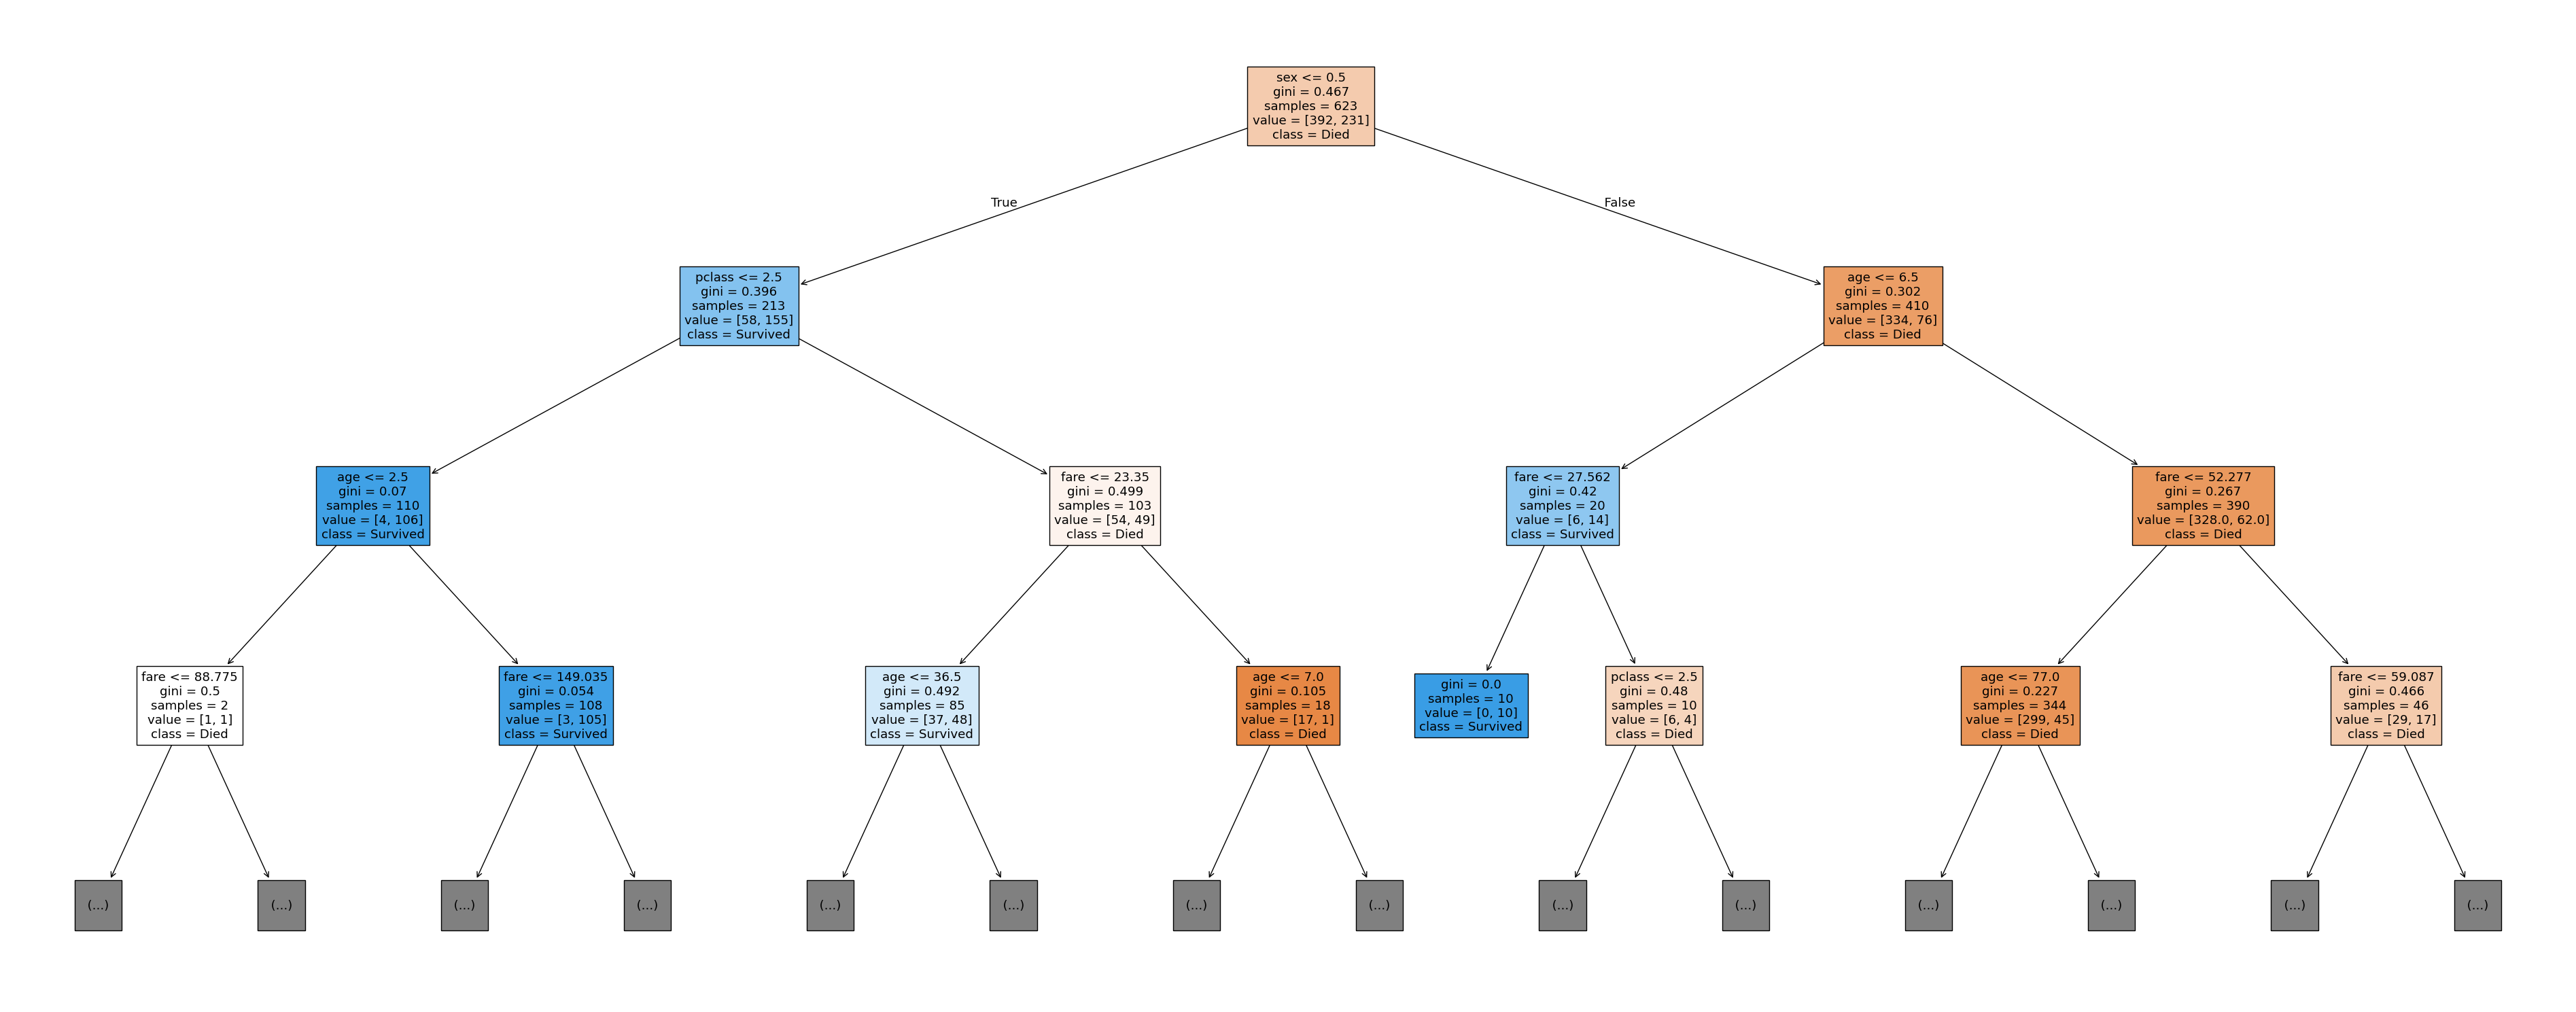

In [15]:
# Visualising a Decision Tree model

plt.figure(figsize=(38, 15))  # Creates a big figure canvas for the plot

plot_tree(
    model,
    feature_names=X.columns, # Names of input features (columns), for node labels
    class_names=["Died", "Survived"], # Labels for output classes
    filled=True, # Colors the nodes based on class dominance
    max_depth=3 # Shows only top 3 levels of the tree
)

plt.tight_layout()
plt.show()

# Decision Tree with pre-pruning

In [16]:
# To perform pre-pruning, we pass control parameters while training the model

# We don't know the value of max_depth, so we are taking few values of max_depth to know at what depth we get good accuracy
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for depth={depth}, accuracy={acc}")

for depth=2, accuracy=0.7723880597014925
for depth=3, accuracy=0.8059701492537313
for depth=4, accuracy=0.8246268656716418
for depth=5, accuracy=0.7947761194029851
for depth=6, accuracy=0.7835820895522388
for depth=7, accuracy=0.7761194029850746
for depth=8, accuracy=0.8022388059701493
for depth=9, accuracy=0.7761194029850746
for depth=10, accuracy=0.8022388059701493


In [17]:
# Here we observed that we get the best accuracy at the max_depth=4

for depth=4, accuracy=0.8246268656716418


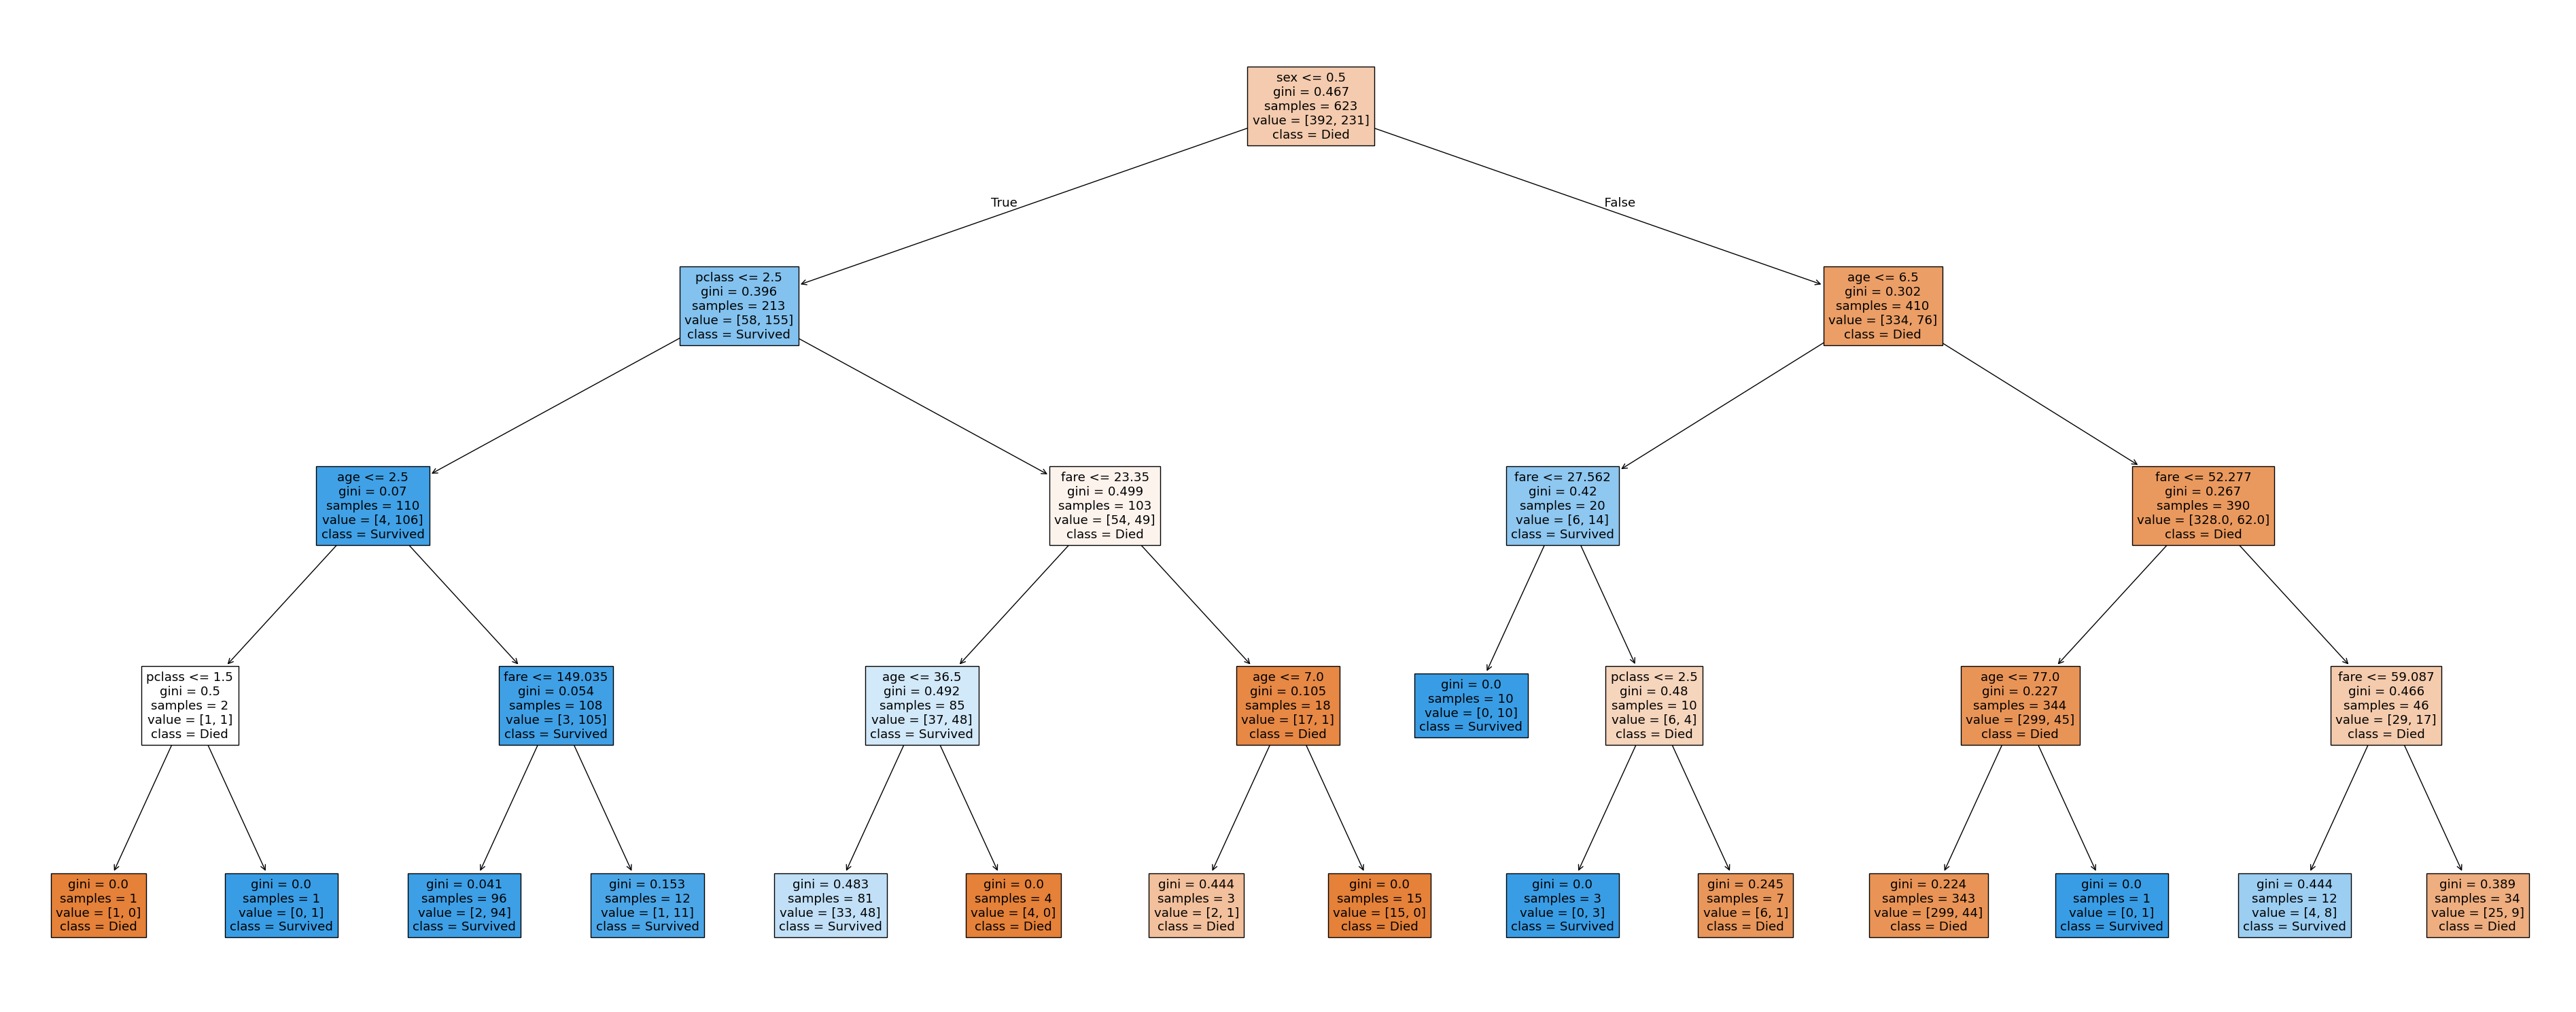

In [18]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
print(f"for depth={4}, accuracy={acc}")

plt.figure(figsize=(38, 15)) 

plot_tree(
    model,
    feature_names=X.columns, 
    class_names=["Died", "Survived"], 
    filled=True,
)

plt.tight_layout()
plt.show()

In [19]:
# Now we take another pre-pruning parameter "min_samples_split"

min_samples_splits = [5, 10, 15, 20, 25, 30]

for split in min_samples_splits:
    model = DecisionTreeClassifier(max_depth=4, min_samples_split=split)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for sample split={split}, accuracy={acc}")

for sample split=5, accuracy=0.8246268656716418
for sample split=10, accuracy=0.8246268656716418
for sample split=15, accuracy=0.8171641791044776
for sample split=20, accuracy=0.8171641791044776
for sample split=25, accuracy=0.8208955223880597
for sample split=30, accuracy=0.8208955223880597


In [20]:
# Here we observed that at sample split 5 & 10 we get the best accuracy so lets take sample split as 10

for sample split=10, accuracy=0.8246268656716418


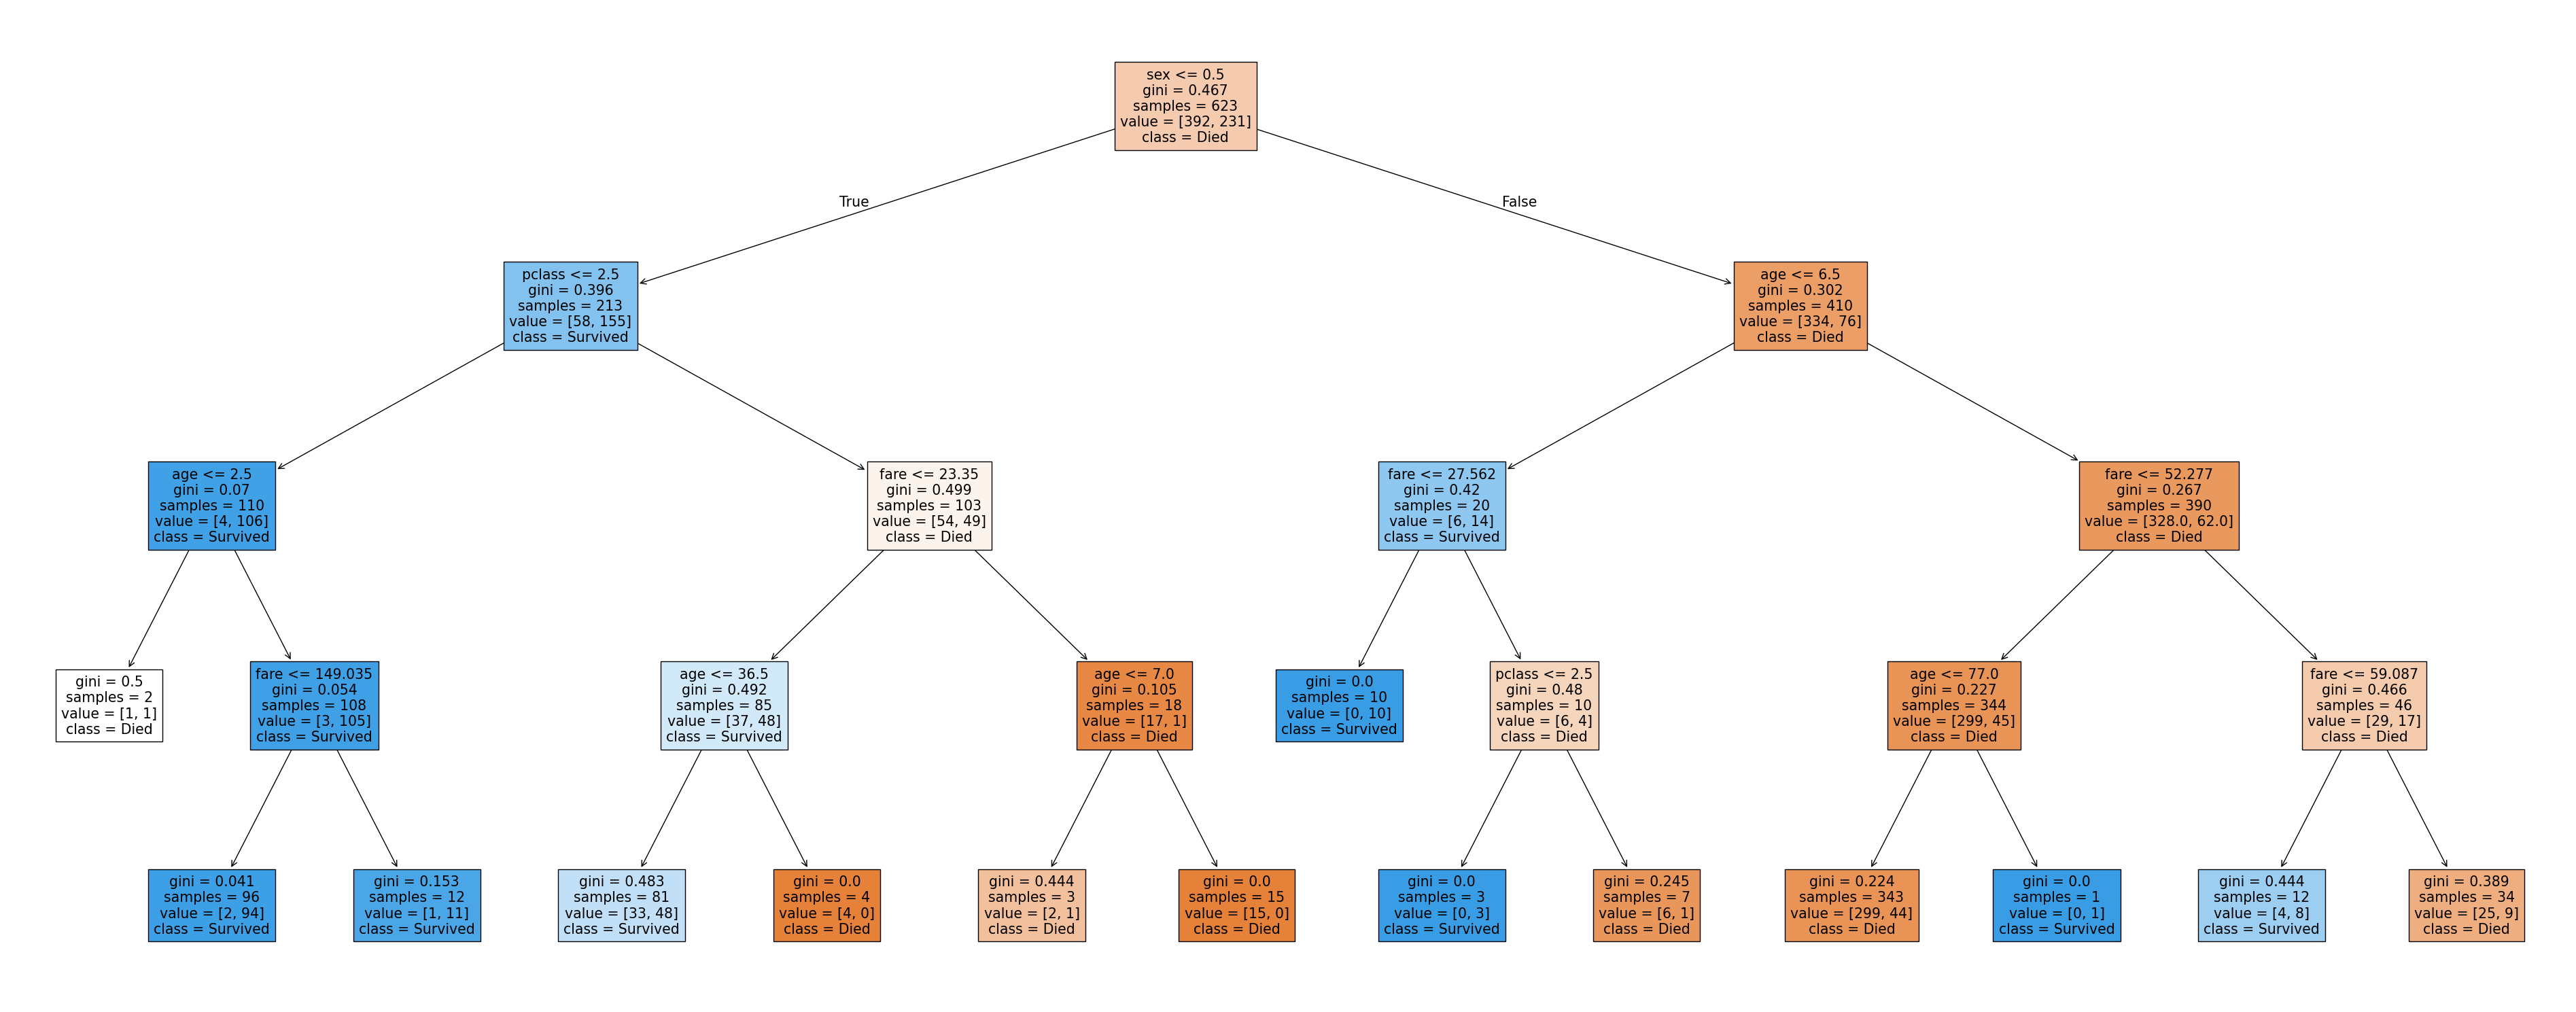

In [21]:
model = DecisionTreeClassifier(max_depth=4,min_samples_split=10)
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
print(f"for sample split={10}, accuracy={acc}")

plt.figure(figsize=(38, 15)) 

plot_tree(
    model,
    feature_names=X.columns, 
    class_names=["Died", "Survived"], 
    filled=True,
)

plt.tight_layout()
plt.show()

In [22]:
# Observation:
# When we used only the "max_depth" parameter, the tree had 15 leaf nodes.
# But when we also used "min_samples_split", the tree had 14 leaf nodes.
# This means one node was prevented from splitting because it had fewer samples than the value specified in "min_samples_split"

# Decision Tree with Post-pruning

In [23]:
# For the post-pruning we need to grow the entire tree
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
# On the basis of training data we find all the values of ccp_alphas
# We are not pruning here just finding the values of ccp_alphas
path = full_tree.cost_complexity_pruning_path(X_train, y_train) # calculates all possible pruning levels for the decision tree means
# It checks how the tree can be gradually pruned(cut) from full size to very small size and stores all pruning options like less pruning or extreme pruning

ccp_alphas = path.ccp_alphas # This extracts only the alpha values from the pruning path
# small alpha → less pruning (big tree)
# big alpha → more pruning (small tree)

print(ccp_alphas)

[0.         0.         0.00013376 0.00013376 0.00022931 0.00032103
 0.00048409 0.00053505 0.00053505 0.00053505 0.00062746 0.00064205
 0.00077709 0.00085607 0.00093633 0.00096308 0.00096308 0.00096308
 0.00099875 0.00101659 0.00104193 0.0010478  0.00107009 0.00109238
 0.00115927 0.0012352  0.00123729 0.00129646 0.00132211 0.00133563
 0.00137583 0.00137583 0.00139708 0.00143228 0.00144145 0.00150482
 0.00151596 0.00152184 0.00171215 0.00183444 0.0019012  0.00195674
 0.00200642 0.00214018 0.00233474 0.0024077  0.00260835 0.00263292
 0.00278606 0.00280169 0.00284379 0.00288925 0.00299625 0.00302412
 0.00431144 0.00495299 0.00577849 0.00589431 0.0074248  0.01236198
 0.01787674 0.04065074 0.1323581 ]


In [25]:
# Here we can observe that
# a) Values like 0.0,0.00013376 means almost no pruning and risk of overfitting
# b) Values like 0.0010 – 0.0030 means balanced pruning and usually best performance zone
# c) Values like 0.04065074, 0.1323581 means heavy pruning and risk of underfitting

In [26]:
# To find the best value of ccp_alpha, we need to run our model for each ccp_alpha value

# Train our model for all alphas
trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [27]:
# We are finding that at what ccp_alpha value we have best accuracy
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

In [28]:
# Best accuracy and ccp_alpha of our model
print(f"Best accuracy: {best_acc}")
print(f"Best ccp_alpha value: {best_alpha}")

Best accuracy: 0.8208955223880597
Best ccp_alpha value: 0.0017121455323702516


In [29]:
# We will now prune our model
# ccp_alpha applies post-pruning (cost-complexity pruning)
# max_depth applies pre-pruning (limits tree depth during training)
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=4)
best_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


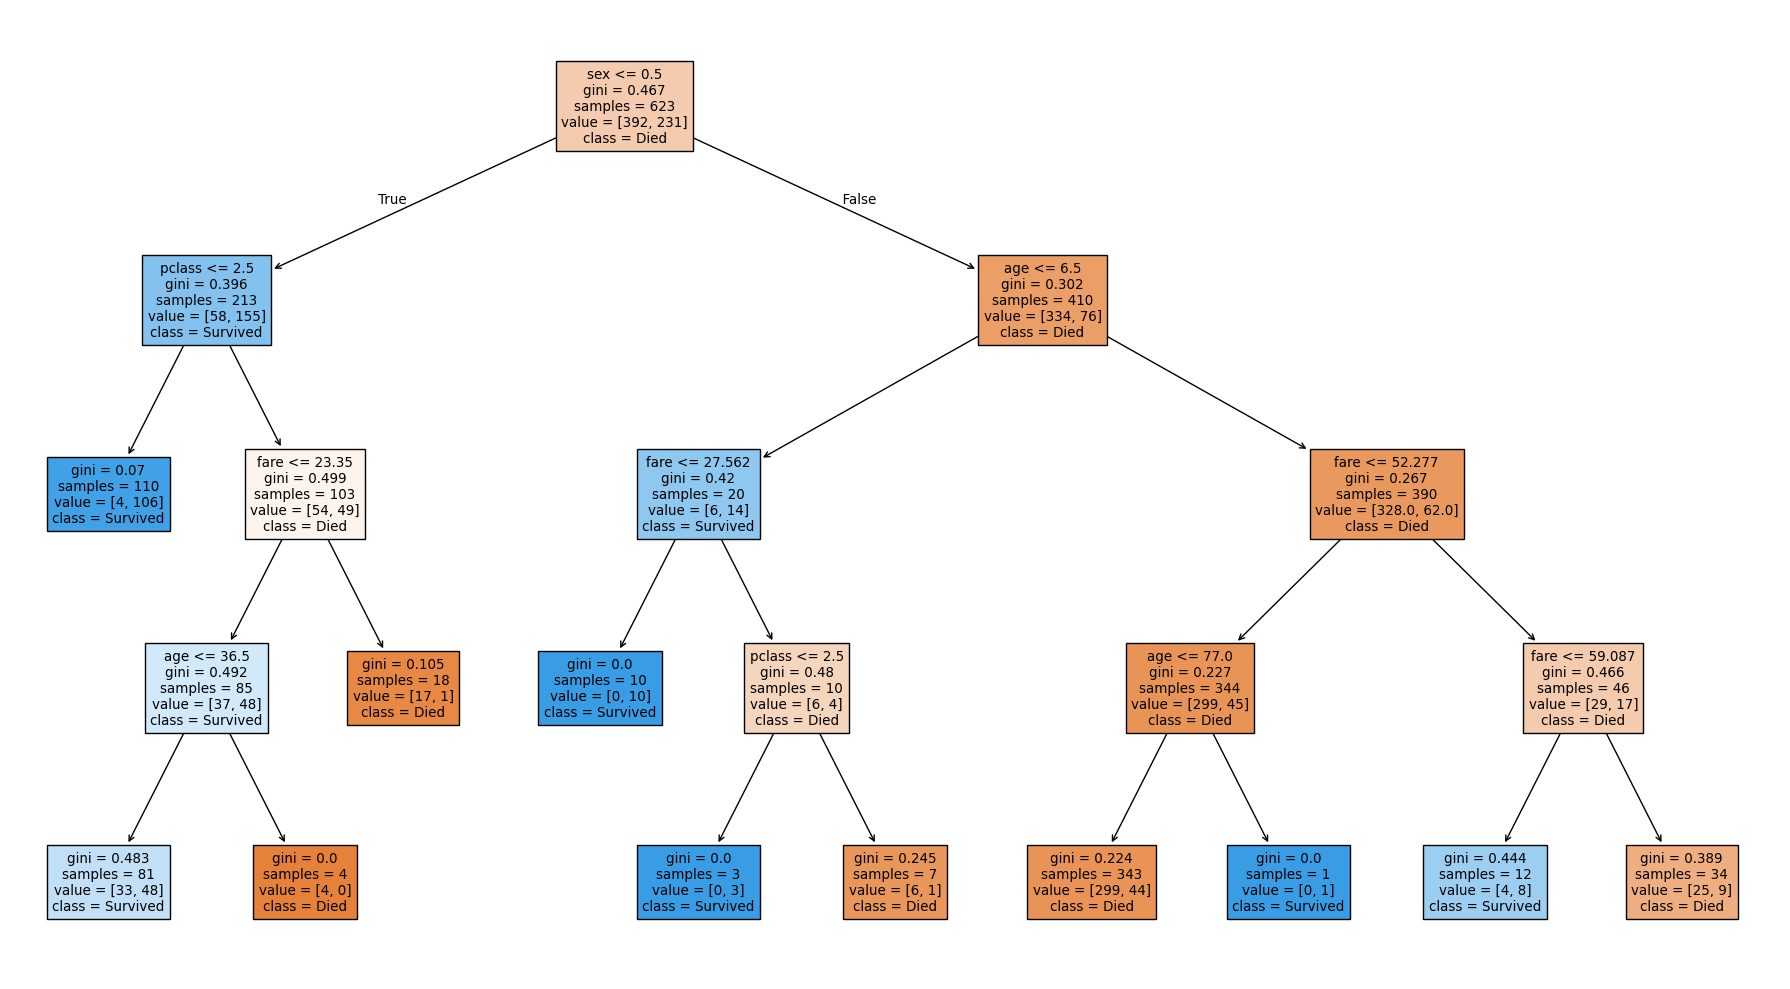

In [30]:
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)
        
plt.tight_layout()
plt.show()

In [31]:
print(best_model.score(X_test, y_test))

0.8246268656716418
